<a href="https://colab.research.google.com/github/qedir314/ML-Projects/blob/main/SpaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer

In [90]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
sample = pd.read_csv("/content/sample_submission.csv")
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [100]:
train.shape, test.shape, sample.shape

((8693, 11), (4277, 13), (4277, 2))

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [81]:
train.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


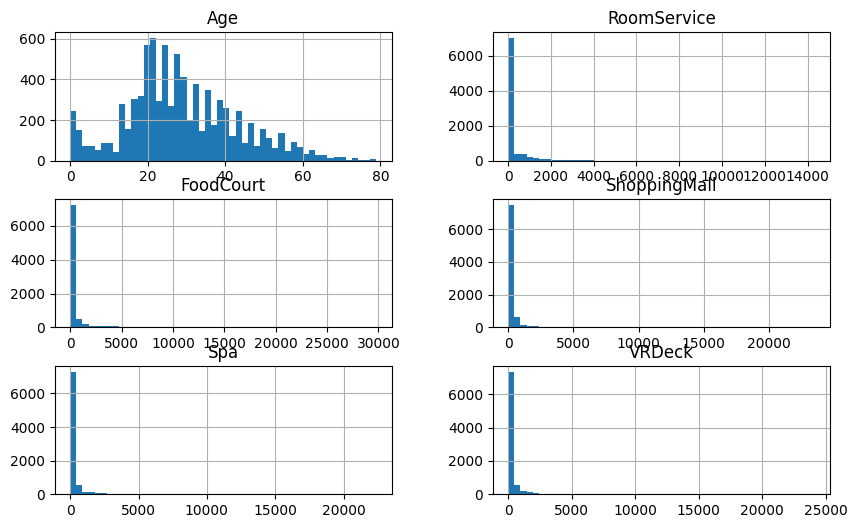

In [73]:
train.hist(bins=50, figsize=(10,6))
plt.show()

In [105]:
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

default_cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", default_num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", default_cat_pipeline, make_column_selector(dtype_include=object))
])

In [92]:
train.drop(columns=["PassengerId", "Name", "Cabin"], inplace=True)
train['Transported'] = train['Transported'].apply(lambda x: 1 if x==True else 0)

In [76]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


In [93]:
X_train, y_train = train.drop(columns=["Transported"]), train["Transported"]
X_train.shape, y_train.shape
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [106]:
preprocessing.fit_transform(X_train)
X_train_processed = preprocessing.transform(X_train)
X_test_processed = preprocessing.transform(X_test)

features = preprocessing.get_feature_names_out()
X_train_processed = pd.DataFrame(X_train_processed, columns=features)
X_test_processed = pd.DataFrame(X_test_processed, columns=features)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    # CatBoostClassifier(verbose=0),
    XGBClassifier()
]
scores = []
for model in models:
    model.fit(X_train_processed, y_train)
    print(f"{model.__class__.__name__}: {model.score(X_test_processed, y_test)}")

LogisticRegression: 0.7757331799884991
DecisionTreeClassifier: 0.7314548591144335
RandomForestClassifier: 0.7694077055779184
SVC: 0.7837837837837838
KNeighborsClassifier: 0.765382403680276
GaussianNB: 0.7320299022426682
XGBClassifier: 0.78953421506613


In [108]:
class Model(tf.keras.Model):
    def __init__(self, units=10, activation="relu", kernel_initializer = "he_normal", **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation, kernel_initializer = kernel_initializer)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation, kernel_initializer = kernel_initializer)
        self.hidden3 = tf.keras.layers.Dense(units, activation=activation, kernel_initializer = kernel_initializer)
        self.hidden4 = tf.keras.layers.Dense(units, activation=activation, kernel_initializer = kernel_initializer)
        self.hidden5 = tf.keras.layers.Dense(units, activation=activation, kernel_initializer = kernel_initializer)
        self.output_layer = tf.keras.layers.Dense(1, activation="sigmoid")

    def call(self, inputs):
        flatten = self.flatten(inputs)
        hidden1 = self.hidden1(flatten)
        hidden2 = self.hidden2(hidden1)
        hidden3 = self.hidden3(hidden2)
        hidden4 = self.hidden4(hidden3)
        hidden5 = self.hidden5(hidden4)
        return self.output_layer(hidden5)

model = Model(50, "relu", name="model")

In [110]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train_processed, y_train, epochs=20, validation_data=(X_test_processed, y_test))

Epoch 1/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8015 - loss: 0.4009 - val_accuracy: 0.7803 - val_loss: 0.4524
Epoch 2/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8133 - loss: 0.3908 - val_accuracy: 0.7872 - val_loss: 0.4517
Epoch 3/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8083 - loss: 0.3956 - val_accuracy: 0.7809 - val_loss: 0.4593
Epoch 4/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8137 - loss: 0.3901 - val_accuracy: 0.7803 - val_loss: 0.4606
Epoch 5/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8134 - loss: 0.3928 - val_accuracy: 0.7798 - val_loss: 0.4634
Epoch 6/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8119 - loss: 0.3941 - val_accuracy: 0.7769 - val_loss: 0.4589
Epoch 7/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8112 - loss: 0.3907 - val_accuracy: 0.7809 - val_loss: 0.4560
Epoch 8/20
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8201 - loss: 0.3803 - val_accuracy: 0.

In [101]:
Transported = model.predict(preprocessing.transform(test.drop(columns=["PassengerId", "Name", "Cabin"])))
Transported = [True if x >= 0.5 else False for x in Transported]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [102]:
submission = pd.DataFrame({"PassengerId": sample["PassengerId"], "Transported": Transported})
submission.to_csv("submission.csv", index=False)